In [1]:
from lib.ekyn import *
from lib.utils import *

from sklearn.model_selection import train_test_split
import joblib
from sklearn.ensemble import RandomForestClassifier

from tqdm import tqdm

In [2]:
folds = get_leave_one_out_cv_ids_for_ekyn()

In [ ]:
for i,(train_ids,test_ids) in tqdm(enumerate(folds)):
    X_train,y_train = load_psd_label_pairs_windowed(train_ids)
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train,y_train)
    joblib.dump(clf,f'psd_RF_cross_val_fold_{i}.joblib')

In [3]:
all_metrics = pd.DataFrame()

for i,(train_ids,test_ids) in tqdm(enumerate(folds)):
    X_test,y_test = load_psd_label_pairs_windowed(test_ids)
    clf = joblib.load(f'psd_RF_cross_val_fold_{i}.joblib')
    y_pred = clf.predict(X_test)
    # cm_grid(y_pred=y_pred.argmax(axis=1),y_true=y_test.argmax(axis=1))
    all_metrics = pd.concat([all_metrics,pd.Series(metrics(y_pred=y_pred,y_true=y_test),name=f'{i}')],axis=1)

16it [00:13,  1.14it/s]


In [4]:
all_metrics.T.describe()

,precision,recall,f1
count,16.000000,16.000000,16.000000
mean,0.905727,0.688997,0.729975
std,0.058892,0.080559,0.097269
min,0.731602,0.564219,0.573619
25%,0.892115,0.633130,0.646361
50%,0.929334,0.675486,0.722204
75%,0.946322,0.757925,0.821913
max,0.955633,0.827755,0.876400


<AxesSubplot:xlabel='value', ylabel='variable'>

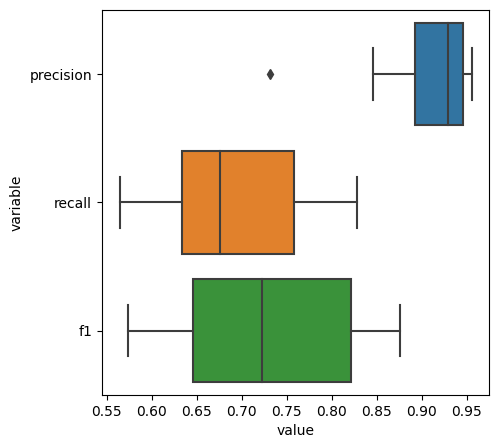

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.boxplot(data=all_metrics.T.melt(),x='value',y='variable')

<AxesSubplot:xlabel='value', ylabel='variable'>

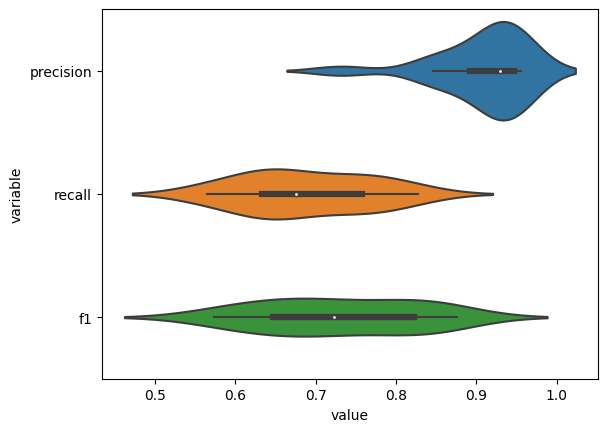

In [29]:
sns.violinplot(data=all_metrics.T.melt(),x='value',y='variable')

<AxesSubplot:xlabel='precision', ylabel='Density'>

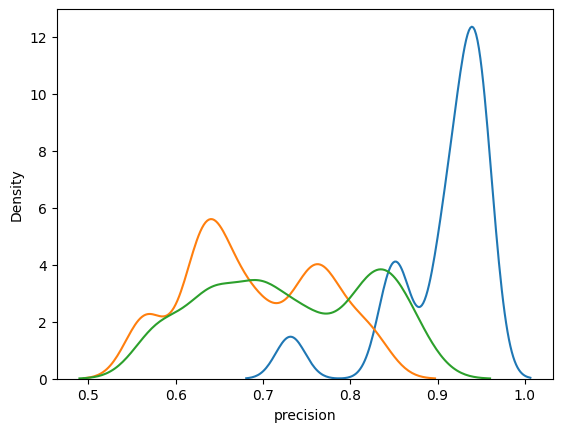

In [27]:
sns.kdeplot(all_metrics.T['precision'],bw_adjust=.5)
sns.kdeplot(all_metrics.T['recall'],bw_adjust=.5)
sns.kdeplot(all_metrics.T['f1'],bw_adjust=.5)

In [6]:
a = all_metrics.reset_index().melt(id_vars='index')
a['variable'] = a['variable'].astype(int)

Text(0, 0.5, 'score')

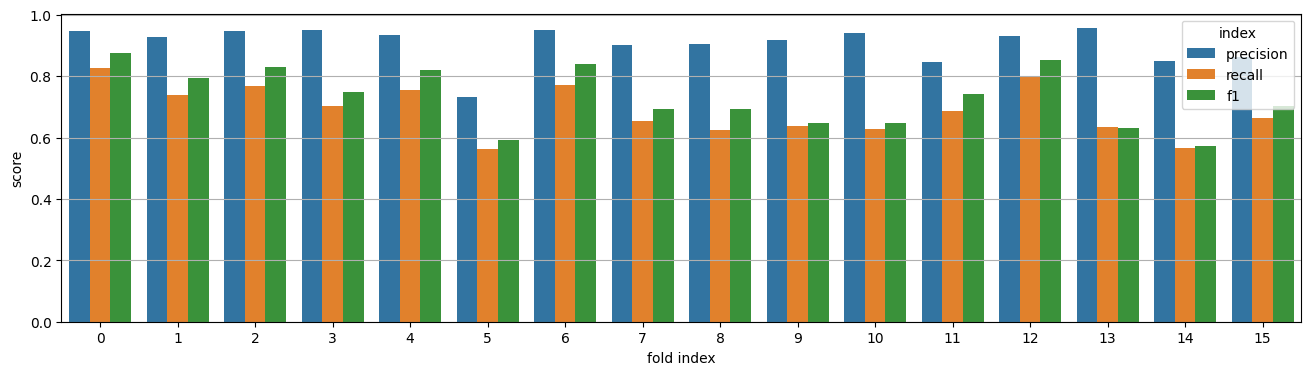

In [15]:
plt.figure(figsize=(16,4))
plt.grid()
sns.barplot(data=a,x='variable',y='value',hue='index')
plt.xlabel('fold index')
plt.ylabel('score')

<AxesSubplot:xlabel='variable', ylabel='value'>

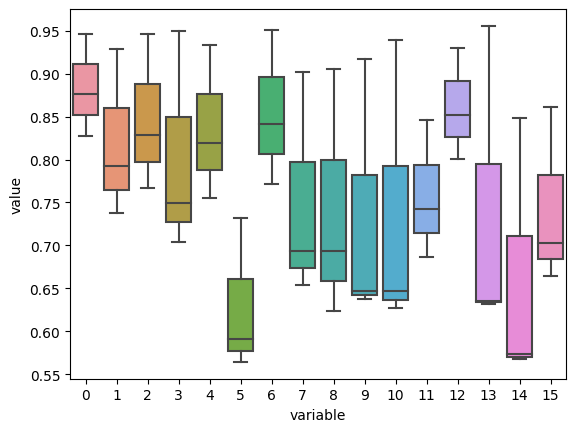

In [16]:
sns.boxplot(data=all_metrics.reset_index().melt(id_vars='index'),x='variable',y='value')

<AxesSubplot:xlabel='precision', ylabel='Density'>

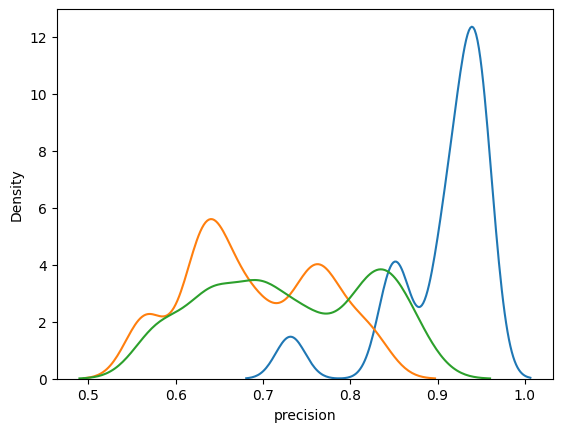